# Assignment 2
### Understanding Uncertainty
### Due 9/12

In [61]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Question 1 


1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

## Question 1 Response
I would define the most profitable item as the item that has a great difference between how much it retails for and how much the state pays for the bottle. I think subtracting how much the state pays for the bottle from how much consumers are paying for the bottle capture the true profit of each item. In addition to looking at the true profit, I think analyzing how often the item is being purchased is also important to better understand its influence across the alcohol market. 

In [63]:
bottle = pd.read_csv("data/iowa.csv")
bottle.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [65]:
# going to create the new true profit column and then do .groupby
bottle["True Profit"] = bottle["State Bottle Retail"] - bottle["State Bottle Cost"]

# using groupby to determine the most profitable sales
sale_by_item = bottle.groupby("Item Description", as_index=False)["True Profit"].sum().sort_values(by="True Profit",ascending=False)
# print(sale_by_item.head())

# okay want to take the previous info and look at it in tandem with sale dollars and quantity sold
quantity_by_item = bottle.groupby("Item Description", as_index=False)["Bottles Sold"].sum().sort_values(by="Bottles Sold",ascending=False)
print(quantity_by_item.head())




# going to concatenate the two dataframes
combined = pd.concat([sale_by_item, quantity_by_item], axis=1)

# link: https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
# dropping duplicate column
combined = combined.loc[:,~combined.columns.duplicated()].copy()
combined

               Item Description  Bottles Sold
1854  FIREBALL CINNAMON WHISKEY         97308
636                BLACK VELVET         76184
5022       TITOS HANDMADE VODKA         57263
2349              HAWKEYE VODKA         53675
1904         FIVE O'CLOCK VODKA         27072


,Item Description,True Profit,Bottles Sold
5022,TITOS HANDMADE VODKA,15806.67,57263
1863,FIREBALL CINNAMON WHISKEY MINI DISPENSER,13773.42,2537
636,BLACK VELVET,13712.81,76184
1323,CROWN ROYAL,11619.02,19817
1358,CROWN ROYAL REGAL APPLE,10789.51,16250
...,...,...,...
4048,REVEL STOKE PEANUT BUTTER,0.84,3
955,CANADIAN MIST PET,0.83,48
1128,CHI-CHI'S PEACH MARGARITA,0.75,24
3995,RED STAG,0.63,3


In [67]:
# bar chart 
# source: https://plotly.com/python/bar-charts/
# there are so many alcohols in the dataset, so I'm only going to show the top 20
import plotly.express as px

combined_top_20_dollar_sales = combined.head(20)
fig= px.bar(combined_top_20_dollar_sales, x='Item Description', y='True Profit', color='Bottles Sold',
             hover_data=['Bottles Sold'], title='True Profit', height=400)
fig.show()

The key takeaway from these visualizations is that Tito's Handmade Vodka is the profitable alcohol in Iowa. 

## Question 2


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [1]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

print(x)
print(y)

print("---------------------------------")

sub = y - x
print(sub)

[1 3 5]
[2 5]
---------------------------------


ValueError: operands could not be broadcast together with shapes (2,) (3,) 

When trying to subtract the two arrays before reshaping them, you get a ValueError that states, "operands could notbe broadcast together with shapes (2,) (3,). This error occurs because the vectors are two different lengths. 

In [3]:
x2 = x.reshape(-1,1)
y2 = y.reshape(1,-1)
print(x2)
print(y2)
print("--------------------")
sub2 = x2 - y2
print(sub2)

[[1]
 [3]
 [5]]
[[2 5]]
--------------------
[[-1 -4]
 [ 1 -2]
 [ 3  0]]


After reshaping the x and y vectors, the output is a 3x2 matrix that is the result of subtracting the y vector from the x vector.

In [4]:
x3 = x.reshape(1,-1)
y3 = y.reshape(-1,1)
print(x3)
print("--------------------")
print(y3)
print("--------------------")
sub3 = x3 - y3
print(sub3)

[[1 3 5]]
--------------------
[[2]
 [5]]
--------------------
[[-1  1  3]
 [-4 -2  0]]


The output after reshaping the two vectors is a 2x3 matrix

In [ ]:
# link: https://stackoverflow.com/questions/9165374/write-code-that-does-the-same-like-numpys-reshape
# writing two for double loops for first example -  want to reshape the first array to only one column and the second to only have one row
x = np.array([1,3,5])
# the following for loop will reshape the array to be a singular row a 1x3 matrix
reshaped = []
row = []
for i in range(1):
    for j in range(3):
        row.append(int(x[j]))
    reshaped.append(row)
print(reshaped)

[[1, 3, 5]]


In [ ]:
x = np.array([1,3,5])
# the following for loop will reshape the array to be a singular row a 1x3 matrix
reshaped2 = []
row2 = []
for i in range(3):
    for j in range(1):
        row2.append(int(x[j]))
    reshaped2.append(row2)
print(reshaped2)
# COME BACK AND FINISH

[[1, 1, 1], [1, 1, 1], [1, 1, 1]]


## Question 3 

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

## Question 3 Response

[ 0  2  5  7 10]
[0, 0, 1, 1, 1]


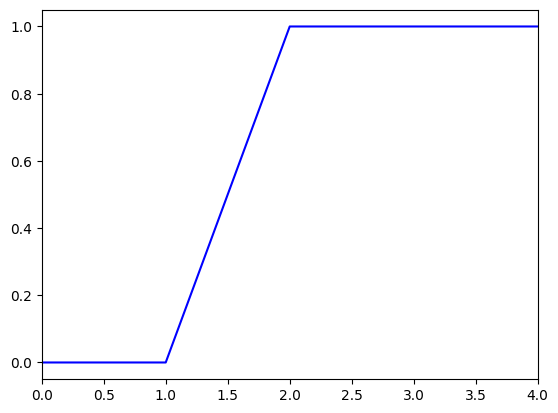

In [ ]:
# plotting the indicator function
data = np.linspace(0, 10, 5, dtype=int)
print(data)

def indicator_function(input_data, threshold):
    indicators = []
    for z in input_data:
        if z >= threshold:
            indicators.append(1)
        else:
            indicators.append(0)
    return indicators
    

idk = indicator_function(data,3)
print(idk)
        
# okay now i need to plot the output

# Plot
plt.plot(idk, color='blue')
plt.xlim(0,4)
plt.show()

# COME BACK TO THIS

*** The x axis corresponds to the index of the number in the data set and not the actual data value***

$ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$ is true because of how the indicator function operates. The variable Z in the operator function can be thought of as the data that is being evaluated, while x is the threshold that the data is being compared to. The indicator function works by the following logic:
- If the data is less than the threshold, the indicator returns 0
- If the data is greater than the threshold, the indicator return 1

So if we evaluate the first part of the function, we see that it is saying the data is greater than the threshold so it would return 1. However, once we get 1, we must subtract it from 1 which equals 0. When we evaluate the second half of the equation we see that the data is less than the threshold so it would return 0. After evaluating, we get 0=0 which is true!

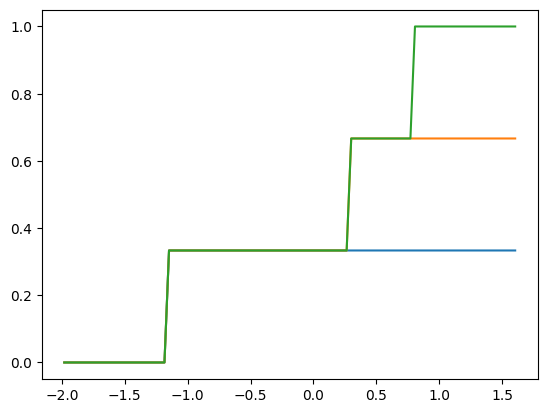

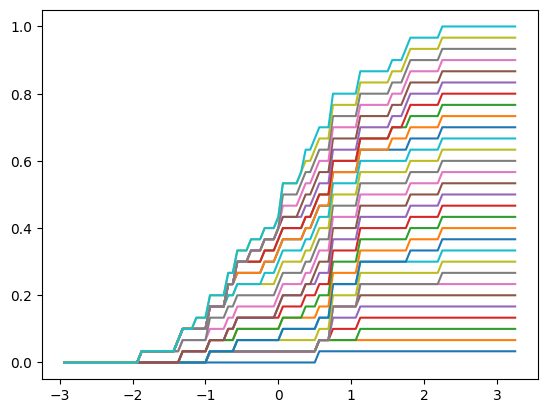

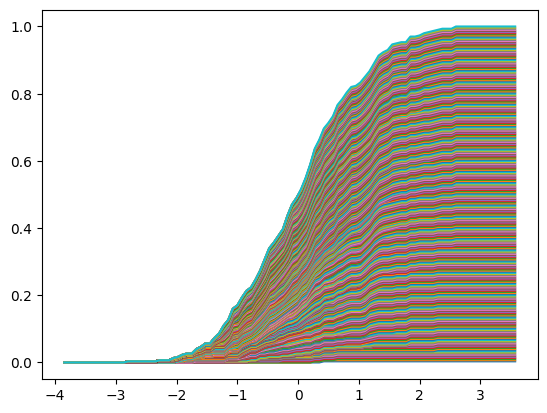

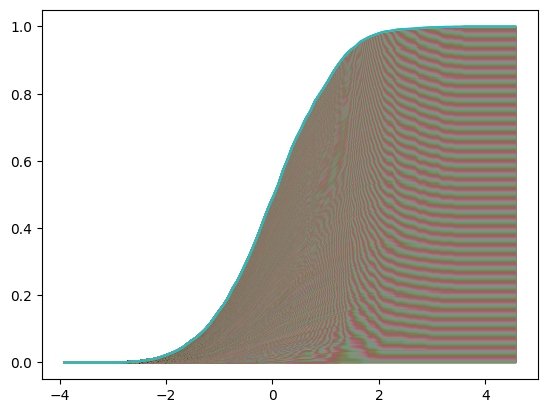

In [59]:
rng = np.random.default_rng(100)

def indicate(x,grid): 
    ''' Indicator function for computing ECDFs. '''
    return x <= grid


for N in (3,30,300,3000):
    X = rng.normal(0,1,N) #- we want to work with X
    grid = np.linspace(X.min()-X.std(), X.max()+X.std(), 100) # Create a grid
    ecdf = 0*grid.copy() # Create a space for values
    # ECDF plot goes here:
    for i in range(len(X)):
        F_i = indicate(X[i],grid)
        # sns.lineplot(x=grid,y=F_i)
        ecdf += F_i
        smooth = ecdf/len(X)
        sns.lineplot(x=grid, y=smooth)
    plt.show()
   

    

As the sample size N grows, the ECDF plot becomes smoother. This occurs because when there is less data, the model becomes more sensitive to each data point, but as you get more data points it begins to smooth out due to it being more resistent to the influence of each data point.

## Question 4


4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

## Question 4 Response

In [85]:
# function that computes any quantile without using numpu np.quantile 
# the test data set will be the Iowa sales data
iowa_test = bottle["Sale (Dollars)"] # going to convert to a list 
trial = np.linspace(0,100,50, dtype=int)
# print(iowa_test)
def quantile(data, quantile): 
    """
    quantile function: (1-g)*y[j] + g*y[j+1]


    """
    sorted_data = sorted(data) # first need to sort the data in ascending order
    n = len(sorted_data) # need to get how the number of elements in the list
    index = quantile * (n-1)
    # j = (quantile* n + (1-quantile) - 1) // 1
    # g = (quantile *n + (1-quantile) - 1) % 1
    j = int(index) #---- chatgpt helped me with this formula; i tried following the math documentation on the np.quantile website but i kept getting an error
    g = index - j
    answer = (1-g)*sorted_data[j] + g*sorted_data[j+1]
    return answer


    

# checking the output is correct 

quantile_actual = np.quantile(trial, 0.25)
print(quantile_actual)
quantile_trial = quantile(trial, 0.25)
print(quantile_trial)


24.5
24.5


In [ ]:
# Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, w
# hich brackets 50% of the data 
#  and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR

def interquartile_and_whiskers(data):
    low_quartile = quantile(data,0.25)
    high_quartile = quantile(data,0.75)
    iqr = high_quartile - low_quartile
    lower_whisker = low_quartile - (1.5 * iqr)
    higher_whisker = high_quartile + (1.5 * iqr)
    return iqr, lower_whisker, higher_whisker

# checking the output is correct

iqr_actual = (np.quantile(iowa_test, 0.75)) - (np.quantile(iowa_test, 0.25))
lower_whisker_actual = (np.quantile(iowa_test, 0.25)) - (1.5 * iqr_actual)
higher_whisker_trial = (np.quantile(iowa_test, 0.75)) + (1.5 * iqr_actual)
print(iqr_actual)
print(lower_whisker_actual)
print(higher_whisker_trial)


iqr_trial, lower_whisker_trial, higher_whisker_trial = interquartile_and_whiskers(iowa_test)
print(iqr_trial)
print(lower_whisker_trial)
print(higher_whisker_trial)


116.32999999999998
-137.94499999999996
327.375
116.32999999999998
-137.94499999999996
327.375
-137.94499999999996


In [87]:
# Write a function that computes a five-number summary and values for a boxplot: the minimum, 
# the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
def five_number_summary(data):
    sorted_data = sorted(data)
    minimum = sorted_data[0]

    twentyfifthpercent_quantile = quantile(data, 0.25)
    median = quantile(data, 0.50)
    seventyfifthpercent_quantile = quantile(data, 0.75)

    
    maximum = sorted_data[-1]
    iqr, lower_whisker, upper_whisker = interquartile_and_whiskers(data)
    return minimum,twentyfifthpercent_quantile, median, seventyfifthpercent_quantile, maximum


# checking and comparing the outputs

print(bottle["Sale (Dollars)"].describe())
a = five_number_summary(bottle["Sale (Dollars)"])
print(a)


count    159904.000000
mean        146.931598
std         459.368723
min       -1628.400000
25%          36.550000
50%          78.660000
75%         152.880000
max       36720.000000
Name: Sale (Dollars), dtype: float64
(-1628.4, 36.550000000000004, 78.66, 152.88, 36720.0)


In [93]:
# Anything outside the whiskers is 
# an **outlier**; write a function that returns a Boolean vector indicating 
# if the observations are outliers
def outlier_boolean(data):
    outlier_vector = []
    outlier_lower_threshold = interquartile_and_whiskers(data)[1]
    outlier_upper_threshold = interquartile_and_whiskers(data)[2]
    # need to iterate through the data (for loop), compare the value to the thresholds (if statement that returns true or false)
    for entry in data:
        if entry < outlier_lower_threshold or entry > outlier_upper_threshold:
            outlier_vector.append(True)
        else:
            outlier_vector.append(False)
    return outlier_vector

print(outlier_boolean(iowa_test))

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa

In [ ]:
bottle["Sale (Dollars)"].describe()

count    159904.000000
mean        146.931598
std         459.368723
min       -1628.400000
25%          36.550000
50%          78.660000
75%         152.880000
max       36720.000000
Name: Sale (Dollars), dtype: float64

<Axes: ylabel='Sale (Dollars)'>

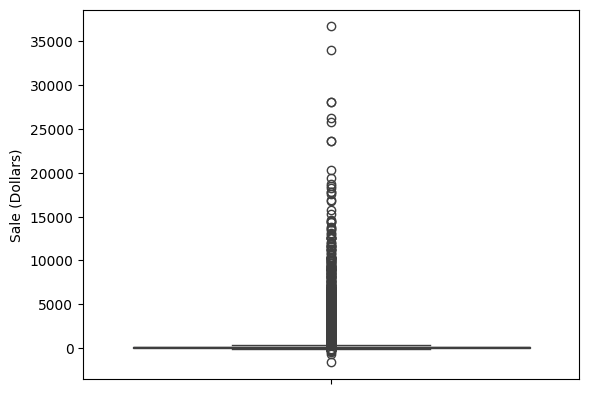

In [96]:
sns.boxplot(bottle["Sale (Dollars)"])

I know it says to compare your answers but I have already been doing that throughout the question!

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?